In [10]:
import tensorflow
from pretty_midi import PrettyMIDI
from music21 import instrument, note, stream, chord, converter
import matplotlib.pyplot as plt
import numpy as np

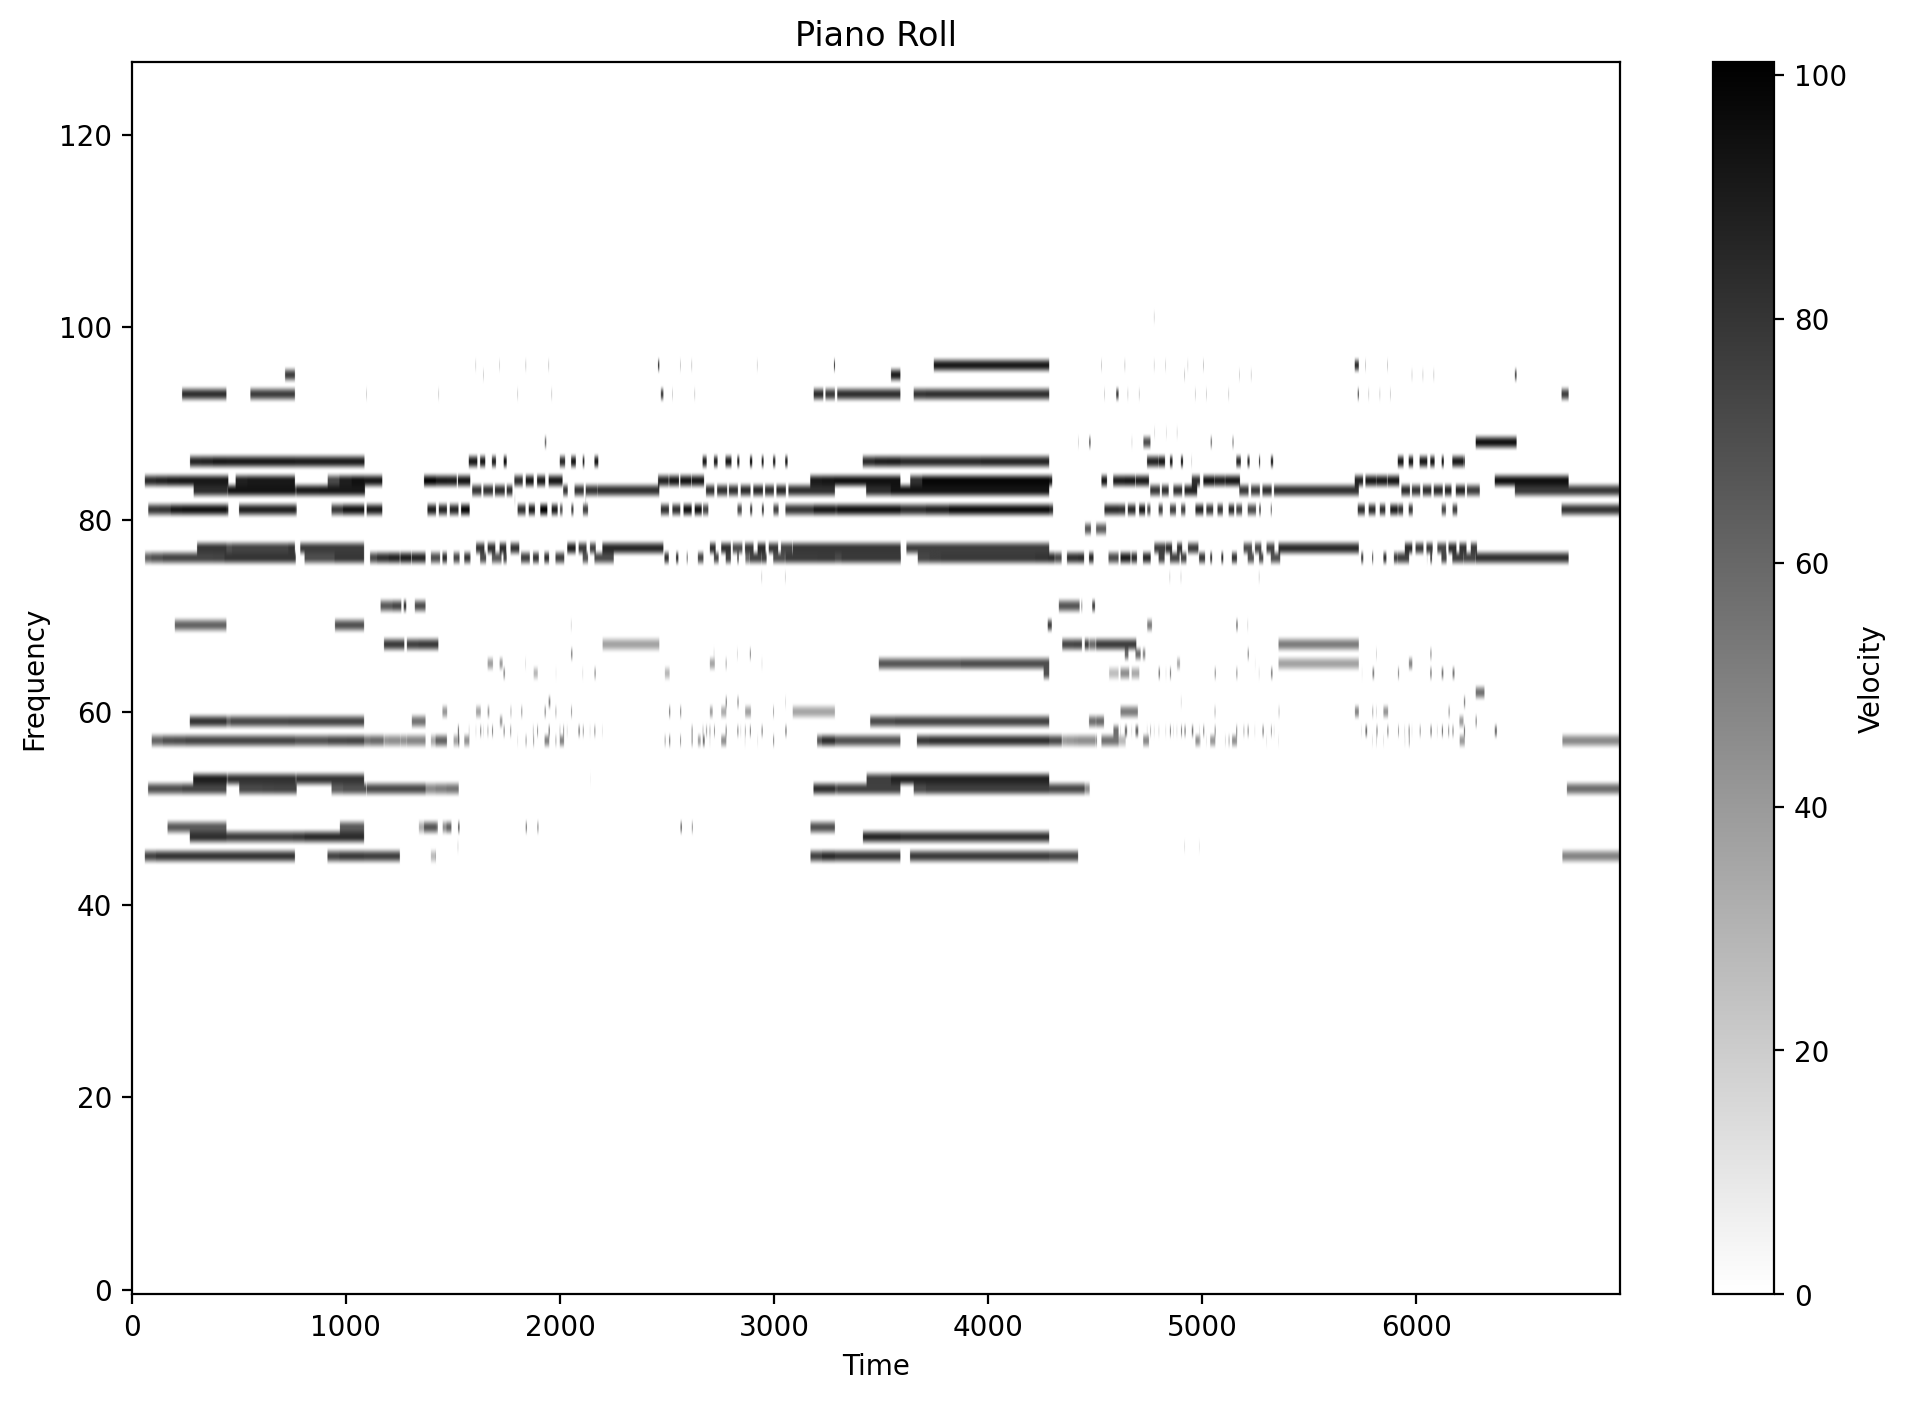

In [21]:
midi_file = "midis/A., Jag, Je t'aime Juliette, OXC7Fd0ZN8o.mid"

music = PrettyMIDI(midi_file=midi_file)
piano_roll = music.get_piano_roll()

# Plot the piano roll
plt.figure(figsize=(12, 8))
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
plt.title('Piano Roll')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Velocity')
plt.show()

In [19]:
def read_file(file):
    notes=[]
    notes_to_parse=None
    #parse the midi file
    midi=converter.parse(file)
    #seperate all instruments from the file
    instrmt=instrument.partitionByInstrument(midi)
    for part in instrmt.parts:
        notes_to_parse=part.recurse()
        #iterate over all the parts of sub stream elements
        #check if element's type is Note or chord
        #if it is chord split them into notes
        for element in notes_to_parse:
            if type(element)==note.Note:
                notes.append(str(element.pitch))
            elif type(element)==chord.Chord:
                notes.append('.'.join(str(n) for n in element.normalOrder))
    #return the list of notes
    return notes

notes_array = np.array(read_file(midi_file))

print(notes_array)

['9.0' 'E5' 'C3' '4.9' 'E5' 'A3' '9.0' 'E5' 'A5' 'E3' 'A3' 'E5' '9.0' 'C3'
 'E5' 'A5' '4.9' '4.9' 'A4' '9.0' '4.9' 'C6' 'A2' 'A6' 'A5' 'E3' 'A3' 'E5'
 '11.2' 'B3' 'A5' '5.11' 'A5' '5.11' 'A5' '11.2' '5.11' 'B3' '5.9'
 '11.2.4' 'A5' '5.11' 'A3' 'C6' 'A2' '11.2.4' 'B3' 'A5' '5.11' 'D6' 'E5'
 'B2' '5.11' 'B3' 'F5' '9.0' '4.9' '4.9' '9.0' 'A6' '4.9' '4.9' '9.0'
 '5.11' 'B3' 'D6' '9.0' 'B2' 'F5' '4.9' 'A6' '4.9' '4.9' '9.0' 'A6' 'A5'
 'E3' 'E5' 'A3' '9.11.2' '5.11' 'B6' 'B3' 'F5' '11.2' '4.9' '5.11' 'F5'
 'B3' 'D6' '11.4' 'A3' '5.11' 'F5' 'B3' '5.11' 'F5' '11' 'F5' 'D6' '11'
 'B5' 'A5' 'F3' 'B2' 'B3' 'F5' '9.0' 'A3' '4.9' 'E5' 'E5' '9' '9.0' 'E5'
 'A5' 'E3' '4.9' 'D6' 'F5' 'B5' 'E5' 'B3' 'A5' '9.0' 'E3' '9' '9.0' 'E3'
 '4.9' 'A3' 'E5' 'C6' 'E3' 'A2' 'A6' 'A5' 'E3' 'E5' 'A3' 'E5' 'B4' 'G4'
 'A3' '4.9' 'B4' 'G4' 'A2' 'E3' 'B4' 'G4' 'E5' 'A3' 'B4' 'G4' 'A3' 'E5'
 'C3' 'B3' 'B4' 'G4' 'C3' '0' 'E3' 'A6' 'A5' 'E5' 'A2' 'A3' 'G4' 'E3' 'A5'
 '9.0.4' '9.0' 'A6' 'A5' '9.0.4' 'E3' 'C6' '10.0' 'C3' 'A6

### For a more readable representation of chords

In [20]:
# Convert chord pitch classes to note names
def convert_chord_to_notes(chord_str):
    pitch_classes = [int(pc) for pc in chord_str.split('.')]
    notes = [note.Note(pitchClass=pc).nameWithOctave for pc in pitch_classes]
    return notes

# Print notes and chords
for n in notes_array:
    if '.' in n:
        print(f"Chord: {n} -> Notes: {convert_chord_to_notes(n)}")
    else:
        print(f"Note: {n}")

Chord: 9.0 -> Notes: ['A4', 'C4']
Note: E5
Note: C3
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: E5
Note: A3
Chord: 9.0 -> Notes: ['A4', 'C4']
Note: E5
Note: A5
Note: E3
Note: A3
Note: E5
Chord: 9.0 -> Notes: ['A4', 'C4']
Note: C3
Note: E5
Note: A5
Chord: 4.9 -> Notes: ['E4', 'A4']
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: A4
Chord: 9.0 -> Notes: ['A4', 'C4']
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: C6
Note: A2
Note: A6
Note: A5
Note: E3
Note: A3
Note: E5
Chord: 11.2 -> Notes: ['B4', 'D4']
Note: B3
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A5
Chord: 11.2 -> Notes: ['B4', 'D4']
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: B3
Chord: 5.9 -> Notes: ['F4', 'A4']
Chord: 11.2.4 -> Notes: ['B4', 'D4', 'E4']
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A3
Note: C6
Note: A2
Chord: 11.2.4 -> Notes: ['B4', 'D4', 'E4']
Note: B3
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: D6
Note: E5
Note: B2
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: B3
Note: F5
Chor